In [1]:
import matplotlib.pyplot as plt
import numpy as np
import shap 
import os 
import sys
if sys.platform == 'darwin':
    print("Current system is macOS")
    main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
elif sys.platform == 'linux':
    print("Current system is Ubuntu")
    main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
else:
    print("Current system is neither macOS nor Ubuntu")
    
sys.path.append(main_fold_path)    
os.chdir(main_fold_path)

Current system is macOS


In [2]:
shap_values_path = 'results/SHAP/shap_values_fNIRS_demo_his_metrics.npy'
shap_values = np.load(shap_values_path, allow_pickle=True)
print(shap_values.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'results/SHAP/shap_values_fNIRS_demo_his_metrics.npy'

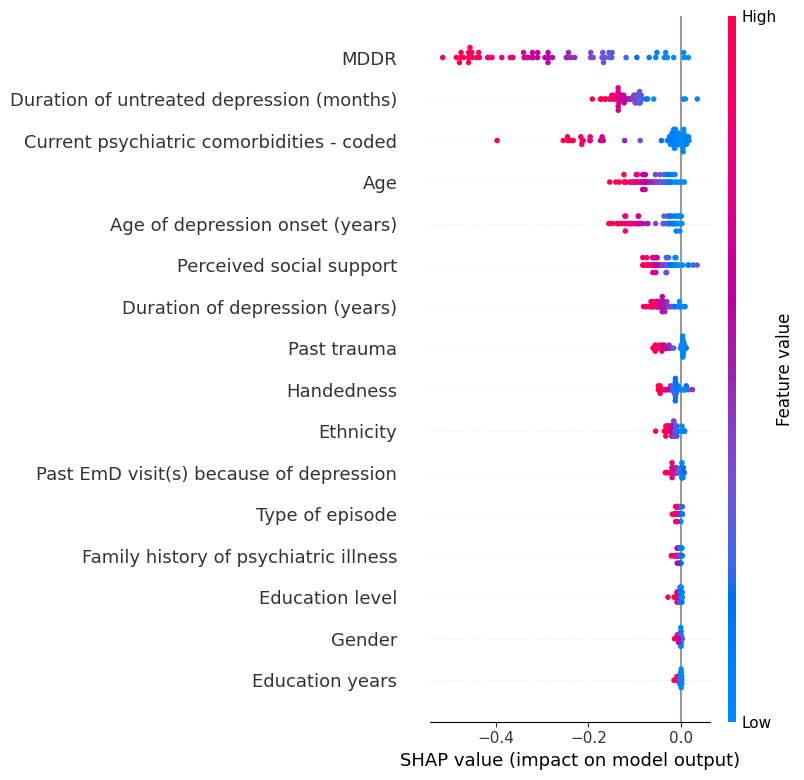

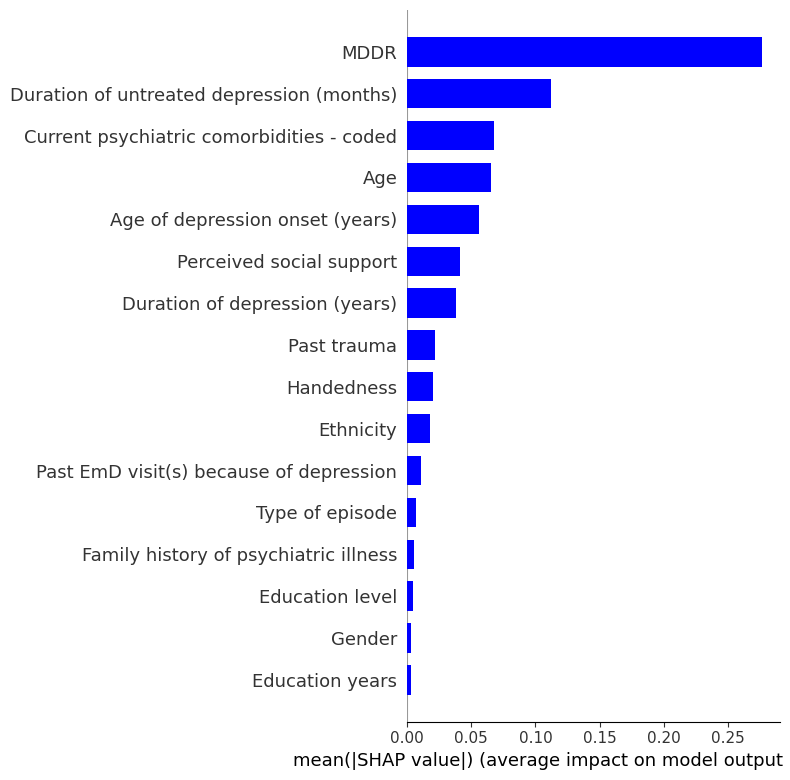

In [4]:
shap_means = np.mean(shap_values, axis=0)

shap_values_path = 'results/SHAP/p1_n1_shap_values_fNIRS_demo_his_metrics.npy'
shap_values = np.load(shap_values_path, allow_pickle=True)
psychiatric_history_name = ['Past trauma', 
                        'Current psychiatric comorbidities - coded',
                        'Family history of psychiatric illness',
                        'Age of depression onset (years)',
                        'Duration of depression (years)',
                        'Duration of untreated depression (months)',
                        'Past EmD visit(s) because of depression',
                        'Type of episode']
demographic_name = ['Age', 'Gender', 'Ethnicity', 'Handedness', 'Education years', 'Education level', 'Perceived social support']
fnirs_name = ['MDDR']


x_input_name = psychiatric_history_name + demographic_name + fnirs_name


shap.summary_plot(shap_means, features=np.abs(shap_means), feature_names=x_input_name)
shap.summary_plot(shap_means, features=np.abs(shap_means), feature_names=x_input_name, plot_type='bar', color='blue')

In [3]:
shap_means = np.mean(shap_values, axis=0)
# shap_stds = np.std(shap_values, axis=0)


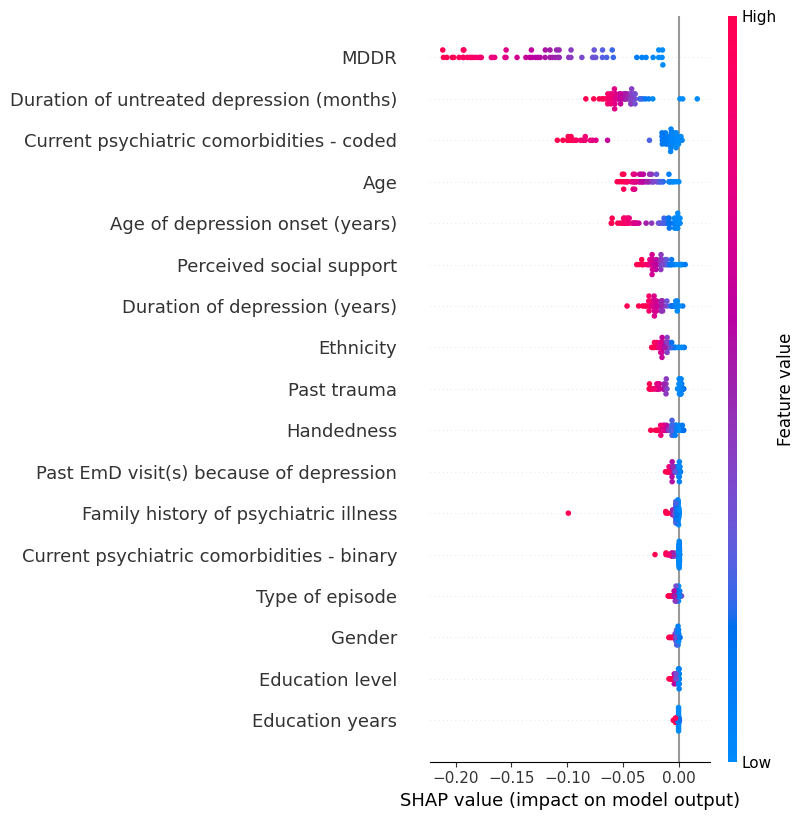

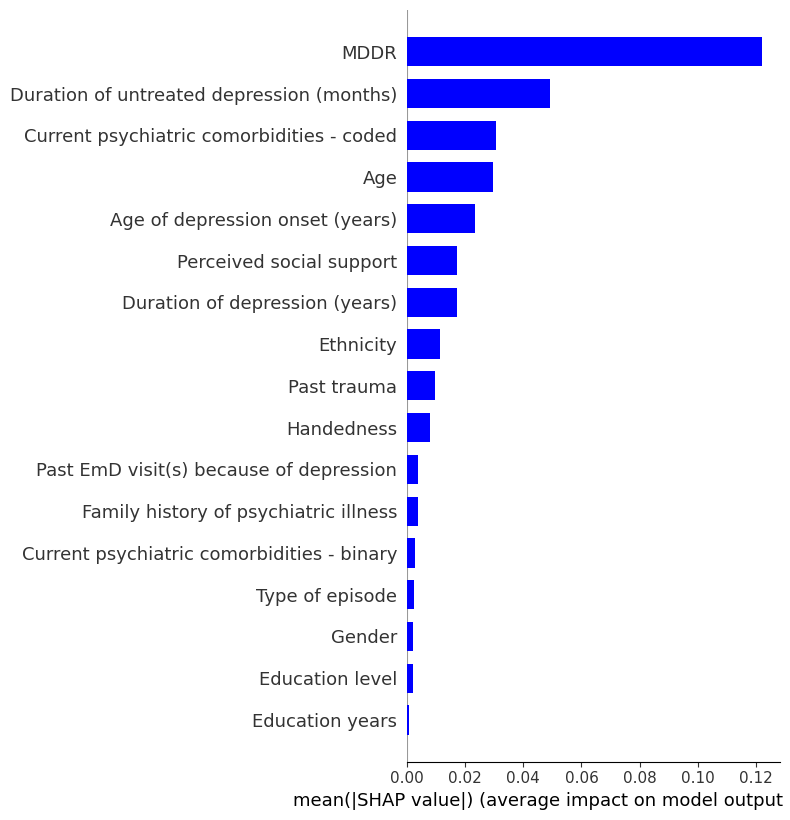

In [26]:

psychiatric_history_name = ['Past trauma', 
                        'Current psychiatric comorbidities - binary', 
                        'Current psychiatric comorbidities - coded',
                        'Family history of psychiatric illness',
                        'Age of depression onset (years)',
                        'Duration of depression (years)',
                        'Duration of untreated depression (months)',
                        'Past EmD visit(s) because of depression',
                        'Type of episode']
demographic_name = ['Age', 'Gender', 'Ethnicity', 'Handedness', 'Education years', 'Education level', 'Perceived social support']
fnirs_name = ['MDDR']


x_input_name = psychiatric_history_name + demographic_name + fnirs_name


shap.summary_plot(shap_means, features=np.abs(shap_means), feature_names=x_input_name)
shap.summary_plot(shap_means, features=np.abs(shap_means), feature_names=x_input_name, plot_type='bar', color='blue')

In [6]:
shap_means.shape

(64, 17)

rank_idx [13 14 10  8  1  3  7 12  0 11  5 15  4  9  2  6 16]
ranked_x_input_name ['Education years', 'Education level', 'Gender', 'Type of episode', 'Current psychiatric comorbidities - binary', 'Family history of psychiatric illness', 'Past EmD visit(s) because of depression', 'Handedness', 'Past trauma', 'Ethnicity', 'Duration of depression (years)', 'Perceived social support', 'Age of depression onset (years)', 'Age', 'Current psychiatric comorbidities - coded', 'Duration of untreated depression (months)', 'MDDR']
<class 'list'>


<BarContainer object of 17 artists>

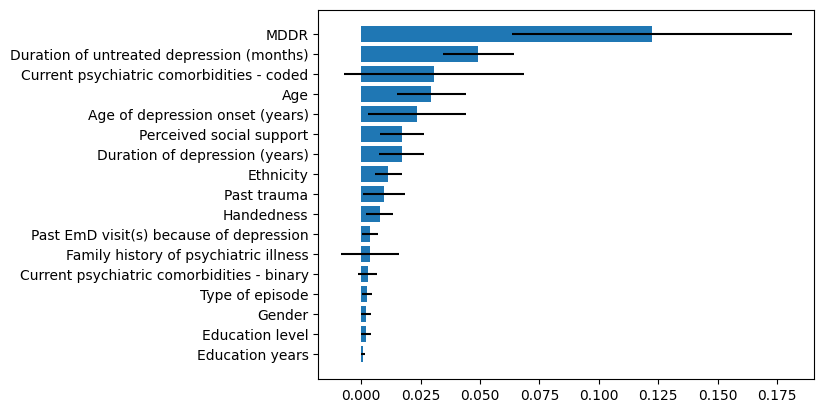

In [27]:
abs_shap_means = np.abs(shap_means)
mean_abs_shap_means = np.mean(abs_shap_means, axis=0)
rank_idx = np.argsort(mean_abs_shap_means)
print('rank_idx', rank_idx)
ranked_x_input_name = [x_input_name[i] for i in rank_idx]

print('ranked_x_input_name', ranked_x_input_name)
ranked_mean_abs_shap_means = mean_abs_shap_means[rank_idx]
ranked_std_abs_shap_means = np.std(abs_shap_means, axis=0)[rank_idx]
ranked_x_input_name = [x_input_name[i] for i in rank_idx]
print(type(ranked_x_input_name))
plt.barh(ranked_x_input_name, ranked_mean_abs_shap_means, xerr=ranked_std_abs_shap_means)
# plt.barh(x_input_name, np.mean(abs_shap_means, axis=0), xerr=np.std(abs_shap_means, axis=0))